# Introduction

## Heart Disease
In this notebook, we will try to answer some questions regarding heart disease as well as try to devise a way to predict whether or not a patient may have heart disease. We will attempt to determine what factors may cause heart disease or at least have some correlation to heart disease.

### What is Heart Disease
Heart disease is a general term that refers to many types of heart conditions, including coronary artery disease (CAD), arrhythmia, heart valve disease, and heart failure. CAD is the most common type of heart disease in the United States. It affects the major blood vessels that supply the heart muscle. Decreased blood flow to the heart can cause a heart attack.

Once diagnosed with heart disease, it can't be cured. However, you can treat the things that contributed to the development of coronary artery disease, which can reduce how the condition impacts your body.

According to CDC statistics:
- One person dies EVERY 33 seconds from Heart Disease in the United States
- 695,000 people in the United States died from heart disease in 2021—that’s 1 in every 5 deaths
- Heart disease cost the United States about $239.9 billion each year from 2018 to 2019.3 This includes the cost of health care services, medicines, and lost productivity due to death

As you can see, Heart Disease is a major worry for alot of people in the United States. It effects many millions of people, either directly or indirectly. Preventing this disease or at least catching it early,  combined with latest treatments and lifestyle changes can result in major strides in longevity of live as well as quality of life well into older age.

# Data Wrangling
Import Data and make any necessary modifications in order to be able to work with the data.

In [1]:
# Import libraries to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the data from the csv file
df = pd.read_csv('HD_cleaned.csv')
df.head()

General_Health                  Checkup Exercise Skin_Cancer Other_Cancer  \
0           Poor  Within the past 2 years       No          No           No   
1      Very Good     Within the past year       No          No           No   
2      Very Good     Within the past year      Yes          No           No   
3           Poor     Within the past year      Yes          No           No   
4           Good     Within the past year       No          No           No   

  Depression Diabetes Arthritis     Sex Age_Category  Height_(cm)  \
0         No       No       Yes  Female        70-74          150   
1         No      Yes        No  Female        70-74          165   
2         No      Yes        No  Female        60-64          163   
3         No      Yes        No    Male        75-79          180   
4         No       No        No    Male          80+          191   

   Weight_(kg)    BMI Smoking_History  Alcohol_Consumption  Fruit_Consumption  \
0        32.66  14.54             Yes                    0                 30   
1        77.11  28.29              No                    0                 30   
2        88.45  33.47              No                    4                 12   
3        93.44  28.73              No                    0                 30   
4        88.45  24.37             Yes                    0                  8   

   Green_Vegetables_Consumption  FriedPotato_Consumption Heart_Disease  
0                            16                       12            No  
1                             0                        4           Yes  
2                             3                       16            No  
3                            30                        8           Yes  
4                             4                        0            No

In [2]:
df.shape

(308854, 19)

In [3]:
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
Heart_Disease                    object
dtype: object

In [4]:
# Split data into modeling and prediction sets
df = df.sample(frac=.95, random_state=123).reset_index(drop=True)
df_unseen = df.sample(frac=.05, random_state=123).reset_index(drop=True)

print('Data for modeling: ' + str(df.shape))
print('Data for predictions: ' + str(df_unseen.shape))

Data for modeling: (293411, 19)
Data for predictions: (14671, 19)


In [5]:
# Setup Pycarent environment
from pycaret.classification import *

In [6]:
clf_exp1 = setup(data = df, target = 'Heart_Disease', session_id=123)

# Exploratory Data Analysis

In [49]:
# Import EDA profiling report tools
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="Profiling Report", dark_mode=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
# profile.to_file('HD_EDA_Profile.html')

# Modeling

In [50]:
compare_models()

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [10]:
lightgbm = create_model('lightgbm')

In [11]:
# tuned_lightgbm = tune_model(lightgbm)

Although the AUC went up slightly, due to the drop in all other scores, we will not use the tuned lightgbm model, just the standard lightgbm model.

In [12]:
lr = create_model('lr')

In [13]:
# tuned_lr = tune_model(lr)

Again, we saw very little imporvement in some areas to make it worthwhile to use the tuned version of the model so we will use the standard version of the model.

In [14]:
nb = create_model('nb')

In [15]:
# tuned_nb = tune_model(nb)

Once again, we will use the standard model, as that model will compliment the other models with its higher recall.

In [16]:
# rf = create_model('rf')

In [17]:
# tuned_rf = tune_model(rf)

Once again, we will use the standard model, as that model will compliment the other models with its higher recall.

In [18]:
# Choosing different fonts for plots because of font warnings

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'  # You can choose a different font if you like


In [19]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [20]:
evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [21]:
evaluate_model(nb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [22]:
# evaluate_model(rf)

In [23]:
# blend_soft_standard = blend_models([lightgbm, lr, nb, rf], method = 'soft')

In [24]:
blend_soft_standard2 = blend_models([lightgbm, lr, nb], method = 'soft')

Due to the higher F1 score, and only slightly lower accuracy, we will use the second model going forward.

In [51]:
evaluate_model(blend_soft_standard2)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [26]:
predict_model(blend_soft_standard2);

In [27]:
# Finalize Model
final_model = finalize_model(blend_soft_standard2)
print(final_model)

Pipeline(memory=FastMemory(location=C:\Users\Ramon\AppData\Local\Temp\joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Height_(cm)', 'Weight_(kg)',
                                             'BMI', 'Alcohol_Consumption',
                                             'Fruit_Consumption',
                                             'Green_Vegetables_Consum...
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit_intercept=True,
                                                                  intercept_scaling=1,
                     

In [28]:
# Test model against holdout data from unseen data
unseen_predictions = predict_model(final_model, data=df_unseen)
unseen_predictions.head()

General_Health                  Checkup Exercise Skin_Cancer Other_Cancer  \
0      Very Good                    Never      Yes          No           No   
1      Very Good     Within the past year      Yes          No           No   
2           Good  Within the past 2 years      Yes          No           No   
3      Very Good     Within the past year      Yes         Yes           No   
4      Very Good     Within the past year       No          No           No   

  Depression Diabetes Arthritis     Sex Age_Category  ...  Weight_(kg)  \
0         No       No        No    Male        30-34  ...    38.560001   
1        Yes      Yes        No    Male        70-74  ...    77.110001   
2         No       No        No    Male        50-54  ...   117.930000   
3         No       No        No  Female        70-74  ...    58.970001   
4         No       No        No    Male          80+  ...    79.379997   

         BMI  Smoking_History Alcohol_Consumption  Fruit_Consumption  \
0  13.720000              Yes                   3                  2   
1  28.290001               No                   2                 20   
2  36.259998               No                   2                  0   
3  20.980000               No                   4                 30   
4  26.610001               No                   2                 30   

   Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  \
0                            30                        2              0   
1                             5                        2              0   
2                             0                        0              0   
3                            20                        8              0   
4                             8                        2              1   

   prediction_label prediction_score  
0                No           0.9939  
1                No           0.5459  
2                No           0.9794  
3                No           0.6479  
4                No           0.5566  

[5 rows x 21 columns]

In [41]:
unseen_predictions.to_csv('unseen_predictions.csv', index=False)

In [29]:
# Save model for future use
# save_model(final_model, 'blended_final_model')

In [37]:
# Test loading model
# saved_blended_model = load_model('blended_final_model')

Transformation Pipeline and Model Successfully Loaded


In [42]:
# Verify model performance on unseen data and check against baseline finalized results
# new_predictions = predict_model(saved_blended_model, data=df_unseen)
# new_predictions.head()

General_Health                  Checkup Exercise Skin_Cancer Other_Cancer  \
0      Very Good                    Never      Yes          No           No   
1      Very Good     Within the past year      Yes          No           No   
2           Good  Within the past 2 years      Yes          No           No   
3      Very Good     Within the past year      Yes         Yes           No   
4      Very Good     Within the past year       No          No           No   

  Depression Diabetes Arthritis     Sex Age_Category  ...  Weight_(kg)  \
0         No       No        No    Male        30-34  ...    38.560001   
1        Yes      Yes        No    Male        70-74  ...    77.110001   
2         No       No        No    Male        50-54  ...   117.930000   
3         No       No        No  Female        70-74  ...    58.970001   
4         No       No        No    Male          80+  ...    79.379997   

         BMI  Smoking_History Alcohol_Consumption  Fruit_Consumption  \
0  13.720000              Yes                   3                  2   
1  28.290001               No                   2                 20   
2  36.259998               No                   2                  0   
3  20.980000               No                   4                 30   
4  26.610001               No                   2                 30   

   Green_Vegetables_Consumption  FriedPotato_Consumption  Heart_Disease  \
0                            30                        2              0   
1                             5                        2              0   
2                             0                        0              0   
3                            20                        8              0   
4                             8                        2              1   

   prediction_label prediction_score  
0                No           0.9939  
1                No           0.5459  
2                No           0.9794  
3                No           0.6479  
4                No           0.5566  

[5 rows x 21 columns]

# Conclusion

From this dataset, we were able to conclude that a high BMI, along with overall higher age, while not the only factors, are major contributors to Heart Disease.

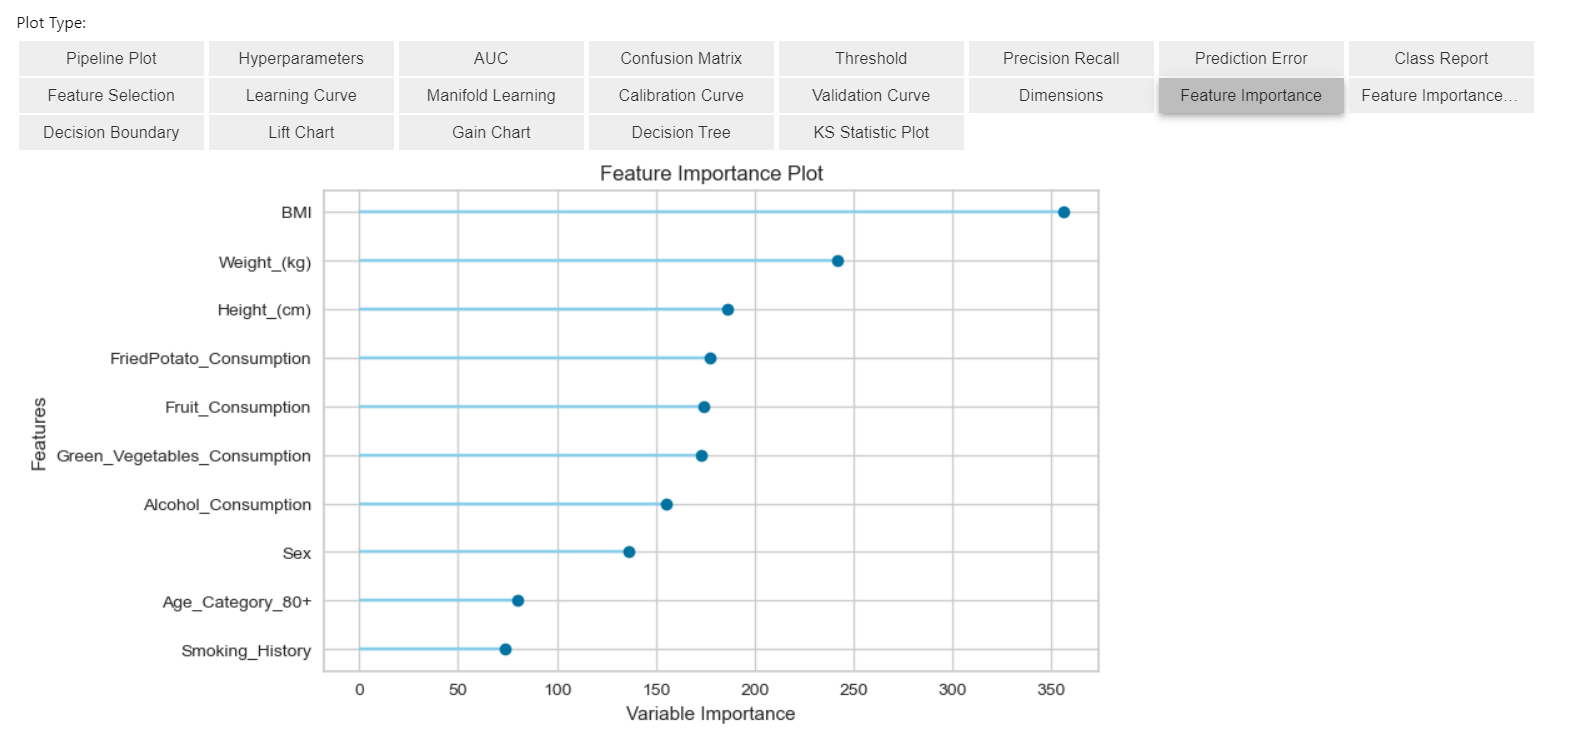

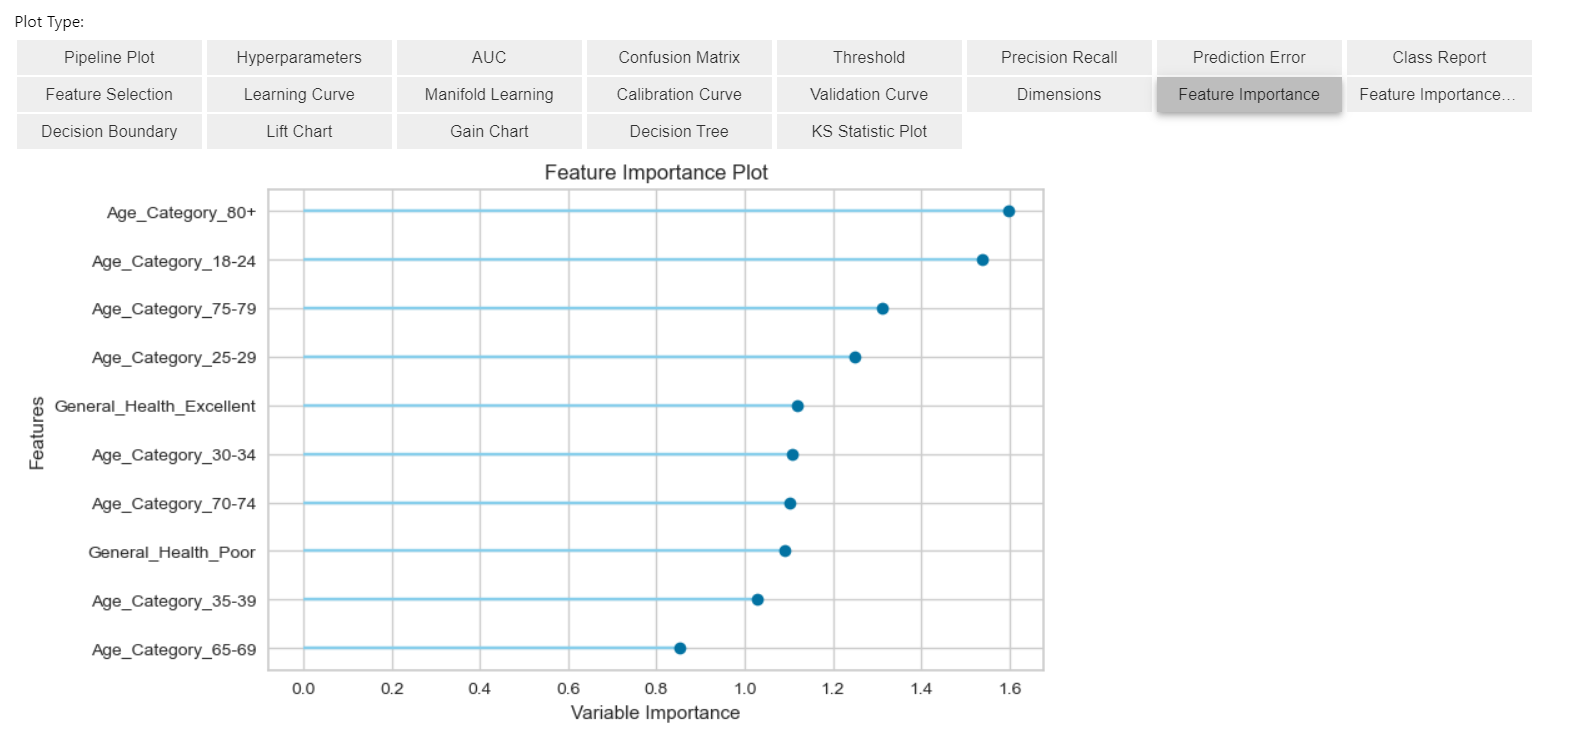



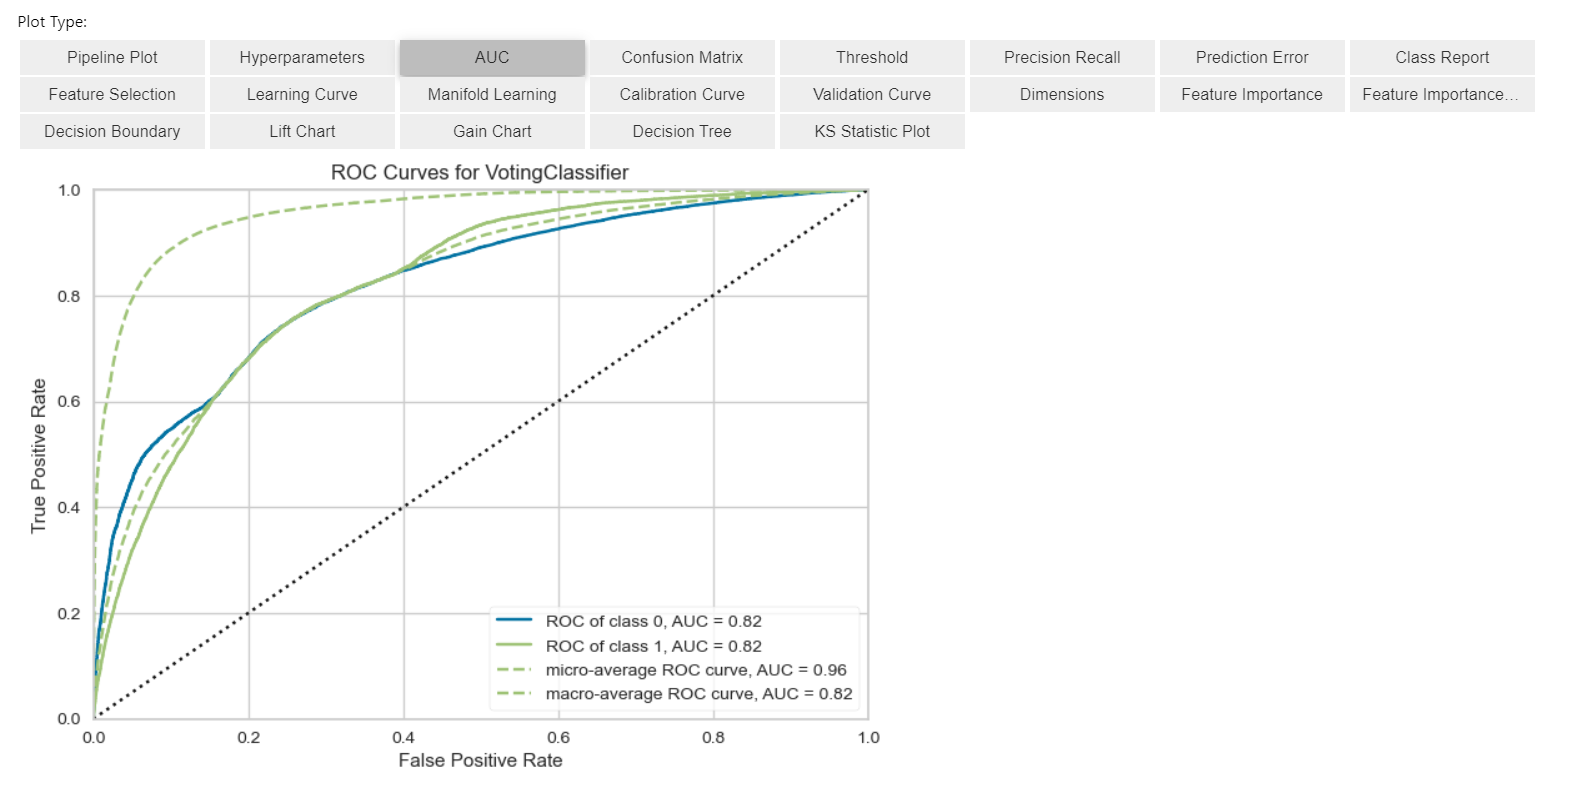

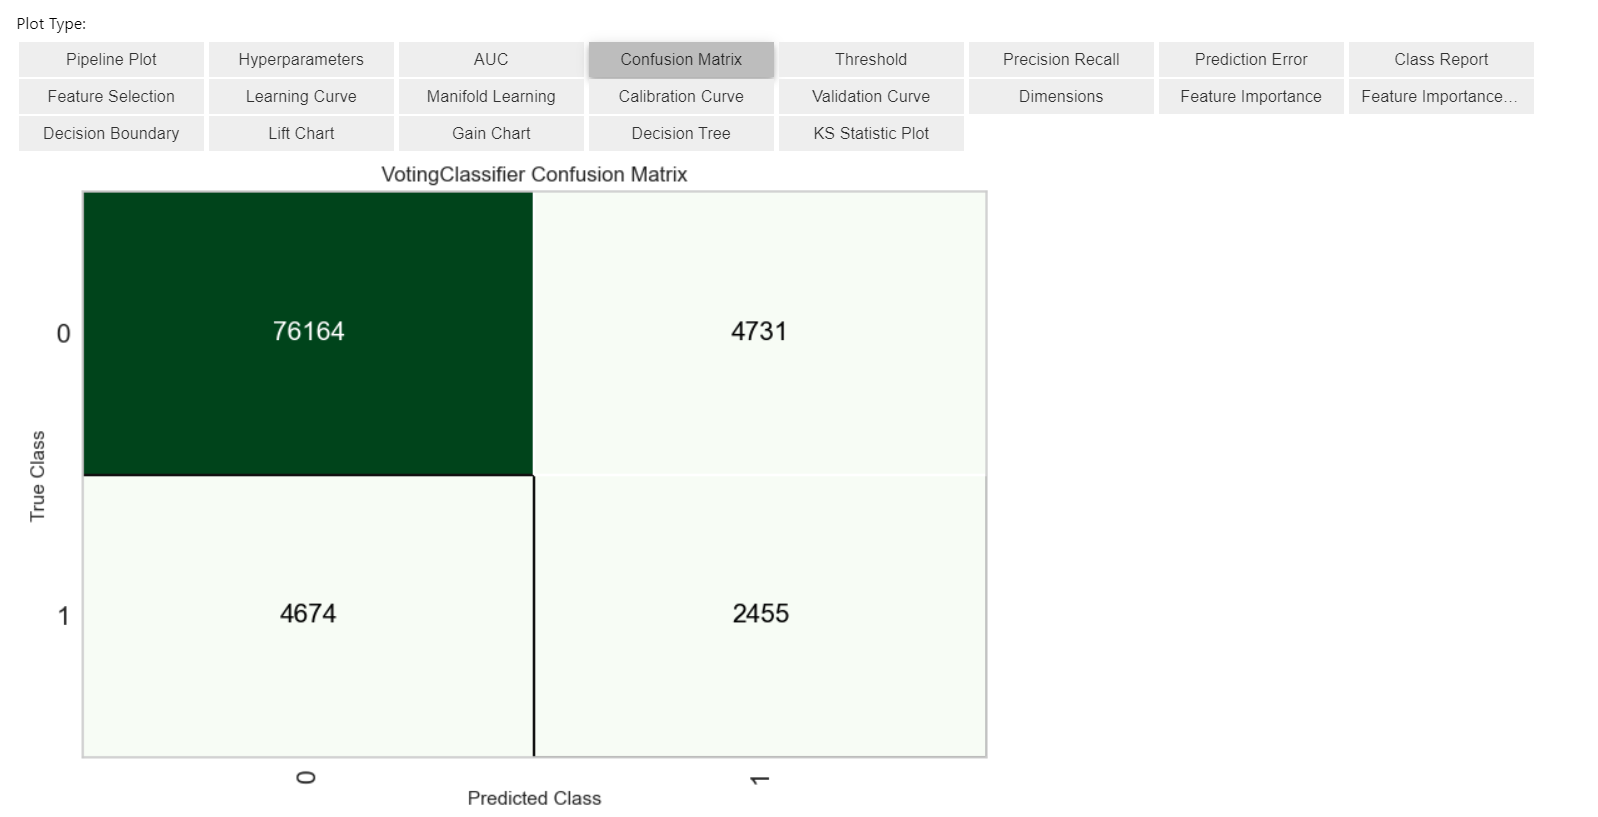

Insights:
The model is performing well in identifying negative cases (no heart disease) with a high specificity of 94.21%.
However, there is room for improvement in the detection of positive cases (heart disease), as indicated by the relatively lower precision and recall values (around 34%).
The number of False Negatives is concerning, as these represent cases where the model failed to identify heart disease. This could have serious implications in a real-world medical scenario.
Similarly, the number of False Positives indicates instances where healthy individuals were incorrectly classified as having heart disease, leading to potential unnecessary medical interventions.

The heart disease classifier demonstrates good performance in identifying individuals without heart disease but requires further tuning and investigation, particularly in the detection of positive cases. The focus should be on reducing both False Negatives and False Positives to create a more reliable and effective classifier for heart disease prediction. Collaboration with medical experts and utilization of domain knowledge could further enhance the model's performance and applicability.

Overall we were able to answer which factors determine, or at least have high correlation to Heart Disease but we were not able to reliably build a model that does a good job at predicting whether or not someone has Heart Disease. As always, these models could be further tuned with more data and other techniques.

# Appendix

CDC statistics: https://www.cdc.gov/heartdisease/facts.htm#:~:text=Heart%20Disease%20in%20the%20United%20States&text=One%20person%20dies%20every%2033,United%20States%20from%20cardiovascular%20disease.&text=About%20695%2C000%20people%20in%20the,1%20in%20every%205%20deaths.

